# US Data Jobs — Exploratory Analysis
<hr>

#### Overview

This notebook analyzes the cleaned US-only job postings dataset (`data_cleaned_jobs.csv`).

#### Goals:
- Identify which data roles pay best and which skills are most requested.
- Focus deep-dive analysis on US Data Analyst positions: locations, employers, pay, and skill economics.
- Produce a short, actionable recommendation: the optimal skill to learn for Data Analysts (balancing demand and pay).

### Importing Libraries and Dataset
<hr>


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# importing cleaned dataset
df = pd.read_csv('data_cleaned_jobs.csv')

# data parsing
df['job_posted_date'] = pd.to_datetime(df.job_posted_date).dt.date
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,company_name,job_skills,original_salary_year_avg
0,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,False,United States,100000.0,"TWO95 International, Inc","[sql, sql server, excel, ssrs, power bi, power...",NaN
1,Data Analyst,Product Managers Data analyst,"Boston, MA",via LinkedIn,Full-time,False,2023-01-01,False,False,United States,90000.0,Diverse Lynx,[sql],NaN
2,Data Scientist,AI/ML Radar Research Data Scientist Jobs,"San Diego, CA",via Clearance Jobs,Full-time,False,2023-01-01,False,False,United States,135000.0,Leidos,"[python, matlab]",NaN
3,Data Analyst,Data Management Analyst,"Dallas, TX",via Indeed,Full-time,False,2023-01-01,False,False,United States,92500.0,KORE1 Technologies,"[sql, excel, tableau, terminal]",NaN
4,Data Scientist,Data Science Consultant,"San Francisco, CA",via Mendeley,Full-time,False,2023-01-01,False,False,United States,157500.0,Resume Library,NaN,NaN


### Number of job postings by Job role
<hr>

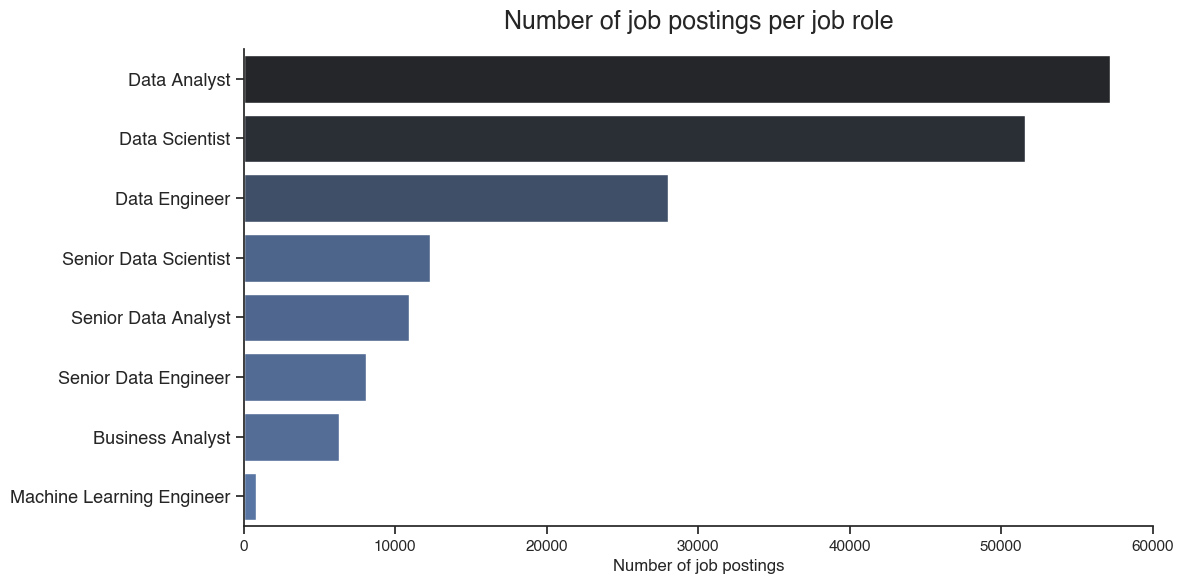

In [147]:
postings_by_role = df.groupby('job_title_short')['job_title_short'].value_counts().sort_values(ascending=False).reset_index(name='job_count')

# Set plot theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette='deep', font='Helvetica', rc=custom_params)

# Plot barchart
sns.barplot(data=postings_by_role, x='job_count', y='job_title_short', hue='job_count', palette='dark:b_r', legend=False)
plt.xlabel('Number of job postings'); plt.ylabel('')
plt.tick_params(axis='y', labelsize=13)
plt.gcf().set_size_inches(12, 6)
plt.title('Number of job postings per job role', fontsize=18, fontweight='bold', y=1.025)
plt.tight_layout()


### Distribution of Job Attributes (Work-from-home, Degree Requirement, Health Insurance)
<hr>

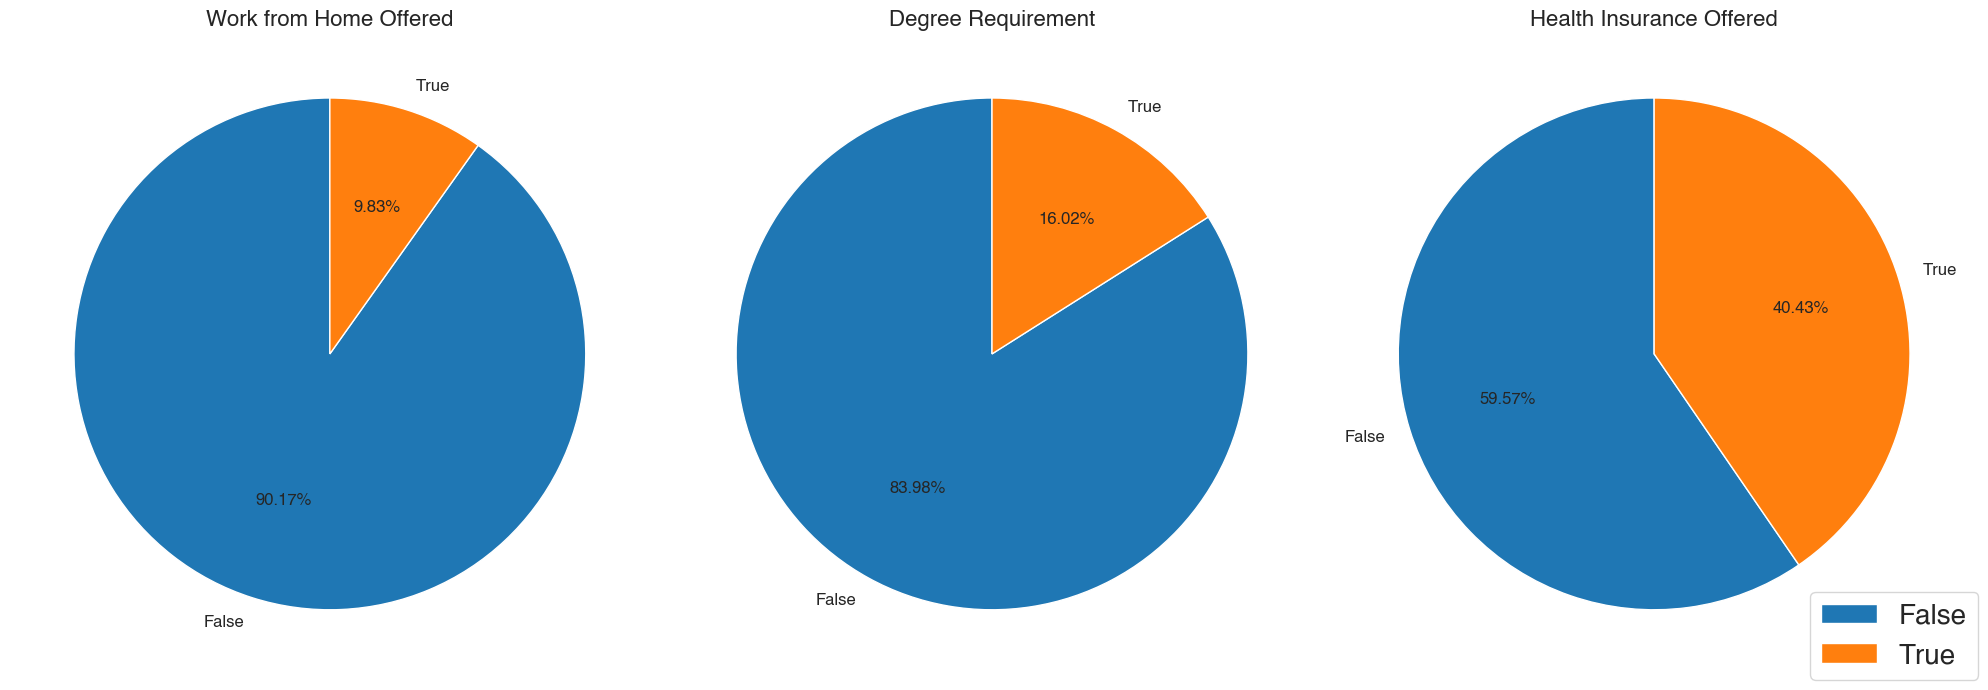

In [ ]:
list_plot = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# plotting the pie charts
fig, ax = plt.subplots(1,3, figsize=(20,20))

for i, (column, title) in enumerate(list_plot.items()):
   df[column].value_counts().plot(kind='pie', ax=ax[i], ylabel='', autopct='%1.2f%%', startangle=90, fontsize=12)
   ax[i].legend().set_visible(False)
   ax[i].set_title(title, fontsize=16, fontweight='bold')

fig.legend(labels=['False', 'True'], bbox_to_anchor=(1, 0.33), loc='lower right', fontsize=20)
fig.tight_layout()


### Number of job postings by company
<hr>

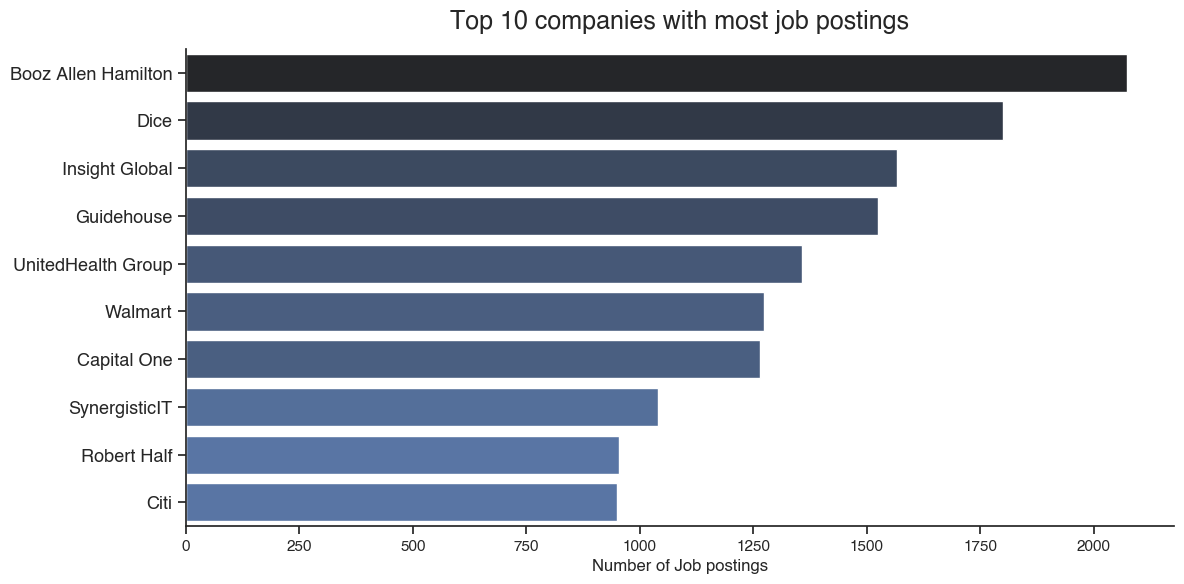

In [154]:
postings_by_company = df.groupby('company_name')['company_name'].value_counts().sort_values(ascending=False).reset_index(name='job_count').set_index('company_name').head(10)
postings_by_company

# Plot barchart
sns.barplot(data=postings_by_company, x='job_count', y='company_name', hue='job_count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Job postings'); plt.ylabel('')
plt.tick_params(axis='y', labelsize=13)
plt.gcf().set_size_inches(12, 6)
plt.title('Top 10 companies with most job postings', fontsize=18, fontweight='bold', y=1.025)
plt.tight_layout()

### Number of job postings by location
<hr>

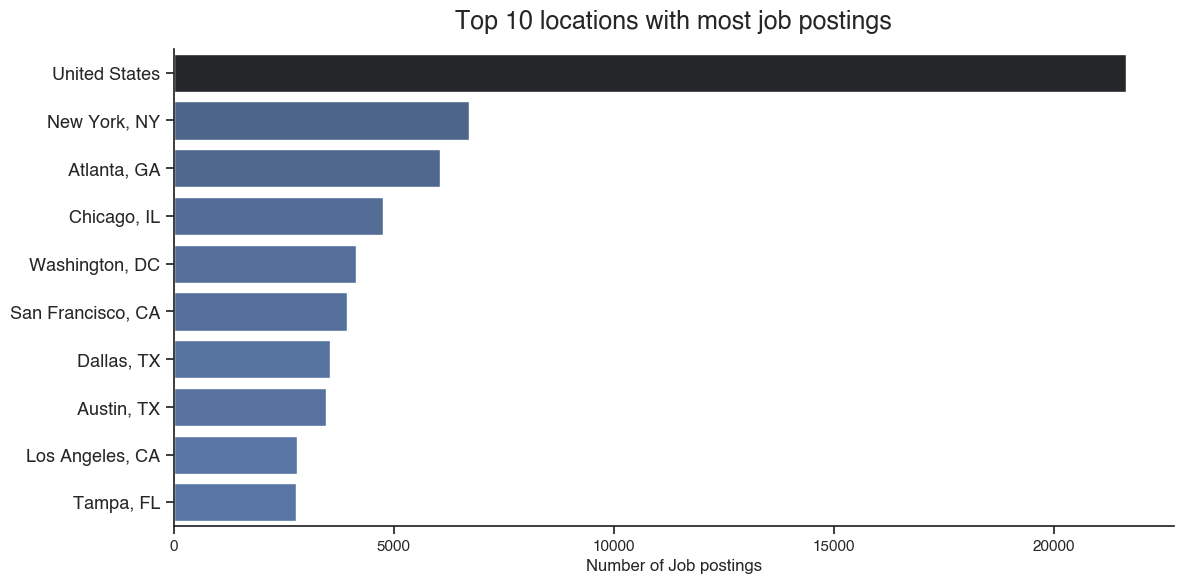

In [153]:
postings_by_loc = df.groupby('job_location')['job_location'].value_counts().sort_values(ascending=False).reset_index(name='job_count').set_index('job_location').head(10)
postings_by_loc

# Plot barchart
sns.barplot(data=postings_by_loc, x='job_count', y='job_location', hue='job_count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Job postings'); plt.ylabel('')
plt.tick_params(axis='y', labelsize=13)
plt.gcf().set_size_inches(12, 6)
plt.title('Top 10 locations with most job postings', fontsize=18, fontweight='bold', y=1.025)
plt.tight_layout()